<a href="https://colab.research.google.com/github/Kusvihawan/Regresi/blob/master/Multi_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi Linear Regression**

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [8]:
#Import data
df_sale = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_sale

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


# Regresi Using sklearn

In [38]:
X = df_sale[['price', 'advertising']].values.reshape(-1,2)
Y = df_sale['pie_sales']
x = X[:, 0]
y = X[:, 1]
z = Y


x_pred = np.linspace(0, 20, 30)   
y_pred = np.linspace(0, 20, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [42]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
predicted = regr.predict(model_viz)
r2 = regr.score(X, Y)

In [43]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


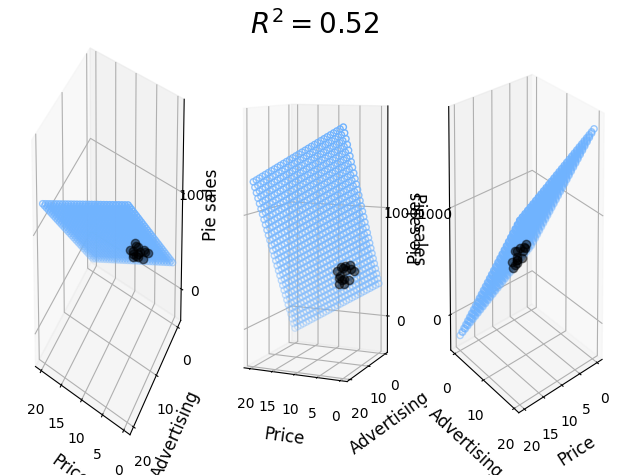

In [44]:
#Visualisasi
plt.style.use('default')

fig = plt.figure()

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3ff')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=15, azim=50)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


In [45]:
X = sm.add_constant(X) # adding a constant

In [46]:
model = sm.OLS(Y, X).fit()
 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0120
Time:                        06:53:23   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0

Pada hasil OLS diatas,
x1 = Price dan x2 = Advertising, variabelnya berubah karena terjadi proses reshaping 
